## Домашнее задание №4

### Задание 1

#### Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

Файл с текстом будет размещен в директории с *.ipynb* файлом домашнего задания. 

In [1]:
import nltk
import matplotlib.pyplot as plt # импортируем модуль для создания графиков
from matplotlib import style
style.use('ggplot')


from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer # импортируем модуль для проведения лемматизации
from nltk.corpus import stopwords

from collections import Counter

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
with open("C:/Users/Леня/Desktop/python/python-dh-hw/Harry_Potter_and_the_Sorcerers_Stone.txt", 'r', encoding='utf-8') as f:
    raw_lines = " ".join(f.read().splitlines())

### Задание 2

#### 1. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

* Новый файл также будет в директори с домашним заданием

In [4]:
def preprocess_write(raw_text): # общая функция для обработки текста
    lemmatizer = WordNetLemmatizer()
    no_punctuation = []
    [no_punctuation.append(word.strip("!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“«»†*—/\-—")) for word in raw_text.split()] # избавляемся от пунктуации
    lowered = [word.lower() for word in no_punctuation] # переводим текст в нижний регистр
    lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in lowered] # лемматизируем текст
    return lemmatized

In [5]:
processed_hp = " ".join(preprocess_write(raw_lines)) # выполняем функцию и объединяем обработанный файл в единую строку
lemmatized = "C:/Users/Леня/Desktop/python/python-dh-hw/harry_potter_lemmatized.txt"
with open(lemmatized, mode='w', encoding='utf-8') as f: # создаем и заполняем "лемматизированный" файл
    f.write(processed_hp)

#### 2. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [6]:
list_text = processed_hp.split(" ")
n_words = len(list_text)
frequecy_dict = Counter(list_text) # подсчитываем абсолютную частоту
rel_frequecy_dict = {}
for key, value in frequecy_dict.items(): # считаем относительную частоту
    rel_frequecy_dict[key] = value
    
sorted_words = sorted(rel_frequecy_dict.items(), key=lambda x: x[1], reverse=True)
sorted_words[:10] # для примера выведем 10 самых частотных слов

[('the', 3603),
 ('be', 2439),
 ('and', 1870),
 ('to', 1845),
 ('a', 1667),
 ('he', 1497),
 ('of', 1255),
 ('harry', 1195),
 ('have', 1043),
 ('it', 993)]

* Предобработка текста не предполагала фильтрацию стоп-слов, из-за этого среди наиболее частотных элементов будут артикли и местоимения

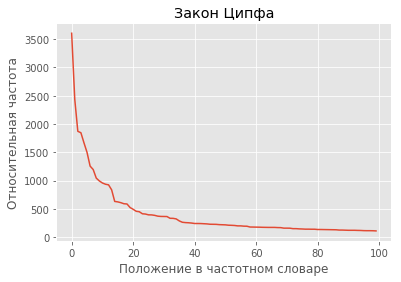

In [7]:
X = range(100)
Y = [word[1] for word in sorted_words]


plt.plot(X, Y[:100]) # строим линейную диаграмму
plt.xlabel("Положение в частотном словаре")
plt.ylabel("Относительная частота")
plt.title("Закон Ципфа")
plt.show()

### Задание 3
#### 1. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [8]:
clean_text = [word for word in list_text if word not in stopwords.words('english')] # очищаем текст от стоп-слов
clean_frequecy_dict = Counter(clean_text) # пересчитываем абсолютную частоту
clean_relative = {}
for key, value in clean_frequecy_dict.items(): # теперь относительную
    clean_relative[key] = value
    
sorted_clean = sorted(clean_relative.items(), key=lambda x: x[1], reverse=True)

#### 2. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

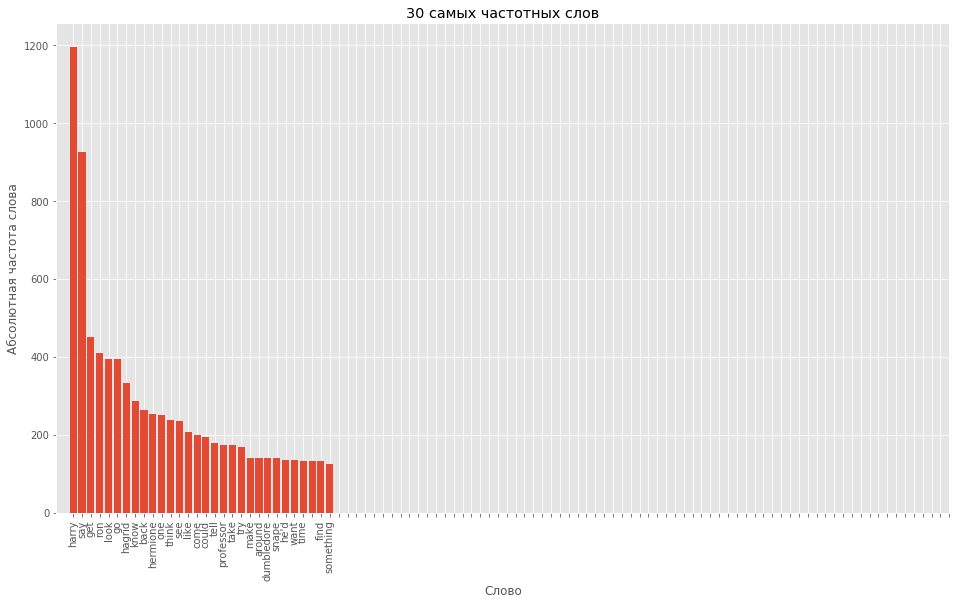

In [9]:
XX = range(30)
YY = [word[1] for word in sorted_clean[:30]]
ZZ = [word[0] for word in sorted_clean[:30]]

plt.figure(figsize=(16, 9)) # строим barplot
plt.bar(XX, YY[:30]) 
plt.title('30 самых частотных слов')
plt.xlabel("Слово")
plt.ylabel('Абсолютная частота слова')
plt.xticks(X, ZZ[:30], rotation=90)
plt.show()